<a href="https://colab.research.google.com/github/cedricguilmin/datamining/blob/main/10_Pandas_discovery_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A word about pandas
pandas is a well known library in Python ecosystem to manipulate tabular data. It allows to quickly generate descriptive statistics about your data, and you can use it to combine multiple data sources.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# librairies that can make dataframe more interactive
from google.colab import data_table

## If you want to get access to data located in your Google Drive, you need the following

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
data_folder = "/content/gdrive/MyDrive/Henallux/Data mining/data"

## Introduction for pandas
Let's see what are some of pandas capabilities
This section reused some examples from this site: https://pandas.pydata.org/docs/user_guide/10min.html#min

In [5]:
# creating a series, which can be seen as a column in a dataset
incremental_series = pd.Series(range(5), index=["a", "b", "c", "d", "e"])
incremental_series

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [6]:
type(incremental_series)

pandas.core.series.Series

In [7]:
# you can get the number of elements in incremental_series
incremental_series.__len__()

5

In [8]:
# another way of doing the same
len(incremental_series)

5

In [9]:
# you can extract the first element of a series. Remember that very first element is at index 0
incremental_series[0]

0

In [10]:
# you can extract the element of a series with the index
incremental_series["b"]

1

In [11]:
# you can extract the last element of a series. Remember that last element can be extracted with: -1
incremental_series[-1]

4

In [12]:
# you can sum all the number of that series
incremental_series.sum()

10

In [13]:
# you can find the mean of that series
incremental_series.mean()

2.0

In [14]:
# you can find the median of that series
incremental_series.median()

2.0

In [15]:
# Find how to compute minimum, maximum, standard dedivation
incremental_series.min(), incremental_series.max(), incremental_series.std()

(0, 4, 1.5811388300841898)

In [16]:
#  and mean absolute deviation
(incremental_series - incremental_series.mean()).abs().mean()

1.2

In [17]:
# another way of computing multiple statistics in 1 line of code
incremental_series.agg(['min', 'max', 'std', 'sum', 'median', 'count'])

min        0.000000
max        4.000000
std        1.581139
sum       10.000000
median     2.000000
count      5.000000
dtype: float64

In [18]:
# you can also change the value at a given location
incremental_series[2] = -3
incremental_series

a    0
b    1
c   -3
d    3
e    4
dtype: int64

In [19]:
# multiple statistics has changed: find a way to compute the same statitics that beofre in 1 line of code
incremental_series.agg(['min', 'max', 'std', 'sum', 'median', 'count'])

min      -3.000000
max       4.000000
std       2.738613
sum       5.000000
median    1.000000
count     5.000000
dtype: float64

In [20]:
# you can check which elements satisfy a specific conditon
incremental_series > 0

a    False
b     True
c    False
d     True
e     True
dtype: bool

In [21]:
# do the same for elements of the vector that are > 3
incremental_series > 3

a    False
b    False
c    False
d    False
e     True
dtype: bool

In [22]:
# keep element of a series that satisfy a specific condition
above3_series = incremental_series > 3
incremental_series[above3_series]

e    4
dtype: int64

In [23]:
# how would you do it to keep elements that are above the mean
abovemean_series = incremental_series > incremental_series.mean()
incremental_series[abovemean_series]

d    3
e    4
dtype: int64

In [24]:
# creating a another series
constant_number_series = pd.Series(5.5, index=["a", "b", "c", "d", "e"])
constant_number_series

a    5.5
b    5.5
c    5.5
d    5.5
e    5.5
dtype: float64

In [25]:
type(constant_number_series)

pandas.core.series.Series

In [26]:
??pandas_dataframe

Object `pandas_dataframe` not found.


In [27]:
# Creation of a pandas dataframe
pandas_dataframe = pd.DataFrame({"increment": incremental_series,
                                 "constant":constant_number_series,
                                 "category": ['a','a','a','b', 'c'] })
pandas_dataframe

,increment,constant,category
a,0,5.5,a
b,1,5.5,a
c,-3,5.5,a
d,3,5.5,b
e,4,5.5,c


In [28]:
# show all column name and their type
pandas_dataframe.dtypes

increment      int64
constant     float64
category      object
dtype: object

In [29]:
type(pandas_dataframe)

pandas.core.frame.DataFrame

In [30]:
pandas_dataframe.increment

a    0
b    1
c   -3
d    3
e    4
Name: increment, dtype: int64

In [31]:
type(pandas_dataframe.increment)

pandas.core.series.Series

In [32]:
type(pandas_dataframe.constant)

pandas.core.series.Series

In [33]:
# create new column which is the sum of the first 2 columns: row-wise operation
pandas_dataframe['increment_plus_constant'] = pandas_dataframe.increment + pandas_dataframe.constant

In [34]:
# create new column which is the multiplication of the first 2 columns: row-wise operation
pandas_dataframe['increment_multiply_constant'] = pandas_dataframe.increment * pandas_dataframe.constant

In [35]:
# allow you to show only first 5 records of a dataset
pandas_dataframe.head()

,increment,constant,category,increment_plus_constant,increment_multiply_constant
a,0,5.5,a,5.5,0.0
b,1,5.5,a,6.5,5.5
c,-3,5.5,a,2.5,-16.5
d,3,5.5,b,8.5,16.5
e,4,5.5,c,9.5,22.0


In [36]:
# you can specify the number of records to be shown if default at 5 does not fit your needs
pandas_dataframe.head(4)

,increment,constant,category,increment_plus_constant,increment_multiply_constant
a,0,5.5,a,5.5,0.0
b,1,5.5,a,6.5,5.5
c,-3,5.5,a,2.5,-16.5
d,3,5.5,b,8.5,16.5


In [37]:
# describe is a quick way to already build some quick statistics
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
print(pandas_dataframe.describe(include = 'all'))

        increment  constant category  increment_plus_constant  \
count    5.000000       5.0        5                 5.000000   
unique        NaN       NaN        3                      NaN   
top           NaN       NaN        a                      NaN   
freq          NaN       NaN        3                      NaN   
mean     1.000000       5.5      NaN                 6.500000   
std      2.738613       0.0      NaN                 2.738613   
min     -3.000000       5.5      NaN                 2.500000   
25%      0.000000       5.5      NaN                 5.500000   
50%      1.000000       5.5      NaN                 6.500000   
75%      3.000000       5.5      NaN                 8.500000   
max      4.000000       5.5      NaN                 9.500000   

        increment_multiply_constant  
count                       5.00000  
unique                          NaN  
top                             NaN  
freq                            NaN  
mean                        5

In [38]:
# sorting dataset can help you organiza dataset the way you want
pandas_dataframe.sort_values('increment')

,increment,constant,category,increment_plus_constant,increment_multiply_constant
c,-3,5.5,a,2.5,-16.5
a,0,5.5,a,5.5,0.0
b,1,5.5,a,6.5,5.5
d,3,5.5,b,8.5,16.5
e,4,5.5,c,9.5,22.0


In [39]:
# you can filter to check specific records
pandas_dataframe[pandas_dataframe.increment <= 0]

,increment,constant,category,increment_plus_constant,increment_multiply_constant
a,0,5.5,a,5.5,0.0
c,-3,5.5,a,2.5,-16.5


In [40]:
# you can count number of records that check a specific condition
pandas_dataframe[pandas_dataframe.increment <= 0].shape[0]#, len(pandas_dataframe[pandas_dataframe.increment <= 0])

2

In [41]:
dir(pandas_dataframe)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

## Exercice related to '/01-countries_iso.xlsx'

In [42]:
# prepare a string containing the path to 01-countries_iso.xlsx on the Google Drive
countries_iso_full_path = data_folder + '/01-countries_iso.xlsx'
countries_iso_solutions_full_path = data_folder + '/solutions/01-countries_iso-solutions.xlsx'

In [43]:
#??pd.read_excel

In [44]:
# read
countries_iso = pd.read_excel(countries_iso_full_path,
                              sheet_name="countries_iso",
                              na_values = ["", " "],
                              keep_default_na = False)
countries_iso_sol = pd.read_excel(countries_iso_solutions_full_path,
                                  sheet_name="countries_iso",
                                  na_values = ["", " "],
                                  keep_default_na = False)

In [45]:
type(countries_iso_sol)

pandas.core.frame.DataFrame

In [46]:
countries_iso_sol.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric,Numeric_formatted,extract 2 first characters from column C,Does column F equals column B,alpha 2 length == 2 ?,alpha 3 length == 3 ?,Alpha 2 contains any number,Country trim space,First letter of country,Country always start with an upper case?,Country after removing all blanks,number of character of column N,number of vowels in column N,Pct vowel
0,Afghanistan,AF,AFG,4,4,AF,True,True,True,False,Afghanistan,A,True,Afghanistan,11,4,0.363636
1,Albania,AL,ALB,8,8,AL,True,True,True,False,Albania,A,True,Albania,7,4,0.571429
2,Algeria,DZ,DZA,12,12,DZ,True,True,True,False,Algeria,A,True,Algeria,7,4,0.571429
3,American Samoa,AS,ASM,16,16,AS,True,True,True,False,American Samoa,A,True,AmericanSamoa,13,7,0.538462
4,Andorra,AD,AND,20,20,AN,False,True,True,False,Andorra,A,True,Andorra,7,3,0.428571


In [47]:
# rename all columns with suffix
def rename_all_except(col):
  str_changed = col if col.upper() == "COUNTRY" else col + '_sol'
  return str_changed
cols = countries_iso_sol.columns
countries_iso_sol.columns = [rename_all_except(col) for col in cols ]

In [48]:
countries_iso_sol.head()

,Country,Alpha-2 code_sol,Alpha-3 code_sol,Numeric_sol,Numeric_formatted_sol,extract 2 first characters from column C_sol,Does column F equals column B_sol,alpha 2 length == 2 ?_sol,alpha 3 length == 3 ?_sol,Alpha 2 contains any number_sol,Country trim space_sol,First letter of country_sol,Country always start with an upper case?_sol,Country after removing all blanks_sol,number of character of column N_sol,number of vowels in column N_sol,Pct vowel_sol
0,Afghanistan,AF,AFG,4,4,AF,True,True,True,False,Afghanistan,A,True,Afghanistan,11,4,0.363636
1,Albania,AL,ALB,8,8,AL,True,True,True,False,Albania,A,True,Albania,7,4,0.571429
2,Algeria,DZ,DZA,12,12,DZ,True,True,True,False,Algeria,A,True,Algeria,7,4,0.571429
3,American Samoa,AS,ASM,16,16,AS,True,True,True,False,American Samoa,A,True,AmericanSamoa,13,7,0.538462
4,Andorra,AD,AND,20,20,AN,False,True,True,False,Andorra,A,True,Andorra,7,3,0.428571


In [49]:
data_table.enable_dataframe_formatter()

In [50]:
countries_iso

,Country,Alpha-2 code,Alpha-3 code,Numeric,Numeric_formatted,extract 2 first characters from column C,Does column F equals column B,alpha 2 length == 2 ?,alpha 3 length == 3 ?,Alpha 2 contains any number,Country trim space,First letter of country,Country always start with an upper case?,Country after removing all blanks,number of character of column N,number of vowels in column N,Pct vowel
0,Afghanistan,AF,AFG,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,AL,ALB,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZ,DZA,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,AS,ASM,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AD,AND,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,Western Sahara,EH,ESH,732,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,Yemen,YE,YEM,887,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,Zambia,ZM,ZMB,894,894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,Zimbabwe,ZW,ZWE,716,716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# if you don't like the interactive mode you can disable this by runnin:
data_table.disable_dataframe_formatter()

In [52]:
# give you the number of records and number of variable of your dataframe
countries_iso.shape

(249, 17)

In [53]:
# list all the columns names of your pandas dataframe
countries_iso.columns

Index(['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric',
       'Numeric_formatted', 'extract 2 first characters from column C',
       'Does column F equals column B', 'alpha 2 length == 2 ?',
       'alpha 3 length == 3 ?', 'Alpha 2 contains any number',
       'Country trim space', 'First letter of country',
       'Country always start with an upper case?',
       'Country after removing all blanks', 'number of character of column N',
       'number of vowels in column N', 'Pct vowel'],
      dtype='object')

In [54]:
# list all columns names of your pandas dataframe + their respective data type
countries_iso.dtypes

Country                                      object
Alpha-2 code                                 object
Alpha-3 code                                 object
Numeric                                       int64
Numeric_formatted                             int64
extract 2 first characters from column C    float64
Does column F equals column B               float64
alpha 2 length == 2 ?                       float64
alpha 3 length == 3 ?                       float64
Alpha 2 contains any number                 float64
Country trim space                          float64
First letter of country                     float64
Country always start with an upper case?    float64
Country after removing all blanks           float64
number of character of column N             float64
number of vowels in column N                float64
Pct vowel                                   float64
dtype: object

### Compute every column, like we did in excel, but this time programatically with Python and the pandas dataframe capabilities

In [55]:
countries_iso['Numeric_formatted_leading0'] = countries_iso['Numeric_formatted'].astype(str)

In [56]:
countries_iso.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric,Numeric_formatted,extract 2 first characters from column C,Does column F equals column B,alpha 2 length == 2 ?,alpha 3 length == 3 ?,Alpha 2 contains any number,Country trim space,First letter of country,Country always start with an upper case?,Country after removing all blanks,number of character of column N,number of vowels in column N,Pct vowel,Numeric_formatted_leading0
0,Afghanistan,AF,AFG,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,Albania,AL,ALB,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
2,Algeria,DZ,DZA,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
3,American Samoa,AS,ASM,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
4,Andorra,AD,AND,20,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20


In [57]:
countries_iso.dtypes

Country                                      object
Alpha-2 code                                 object
Alpha-3 code                                 object
Numeric                                       int64
Numeric_formatted                             int64
extract 2 first characters from column C    float64
Does column F equals column B               float64
alpha 2 length == 2 ?                       float64
alpha 3 length == 3 ?                       float64
Alpha 2 contains any number                 float64
Country trim space                          float64
First letter of country                     float64
Country always start with an upper case?    float64
Country after removing all blanks           float64
number of character of column N             float64
number of vowels in column N                float64
Pct vowel                                   float64
Numeric_formatted_leading0                   object
dtype: object

In [58]:
### add leading 0 to column 'Numeric_formatted_leading0'] such that length of values = 3
countries_iso['Numeric_formatted_leading0'] = countries_iso['Numeric_formatted_leading0'].str.zfill(3)

In [59]:
# 'extract 2 first characters from column C'
# 'Does column F equals column B'
countries_iso['extract 2 first characters from column C'] = countries_iso['Alpha-3 code'].str.slice(stop=2)
countries_iso['Does column F equals column B'] = countries_iso['extract 2 first characters from column C']==countries_iso['Alpha-2 code']

In [60]:
# List distinct values taken by 'Does column F equals column B' and their respective count
countries_iso.groupby(['Does column F equals column B'], dropna=False).size()

Does column F equals column B
False     93
True     156
dtype: int64

In [61]:
countries_iso_with_sol = countries_iso.merge(countries_iso_sol, how="left", on = "Country")
countries_iso_with_sol[countries_iso_with_sol['Does column F equals column B'] != countries_iso_with_sol['Does column F equals column B_sol']]

,Country,Alpha-2 code,Alpha-3 code,Numeric,Numeric_formatted,extract 2 first characters from column C,Does column F equals column B,alpha 2 length == 2 ?,alpha 3 length == 3 ?,Alpha 2 contains any number,...,alpha 2 length == 2 ?_sol,alpha 3 length == 3 ?_sol,Alpha 2 contains any number_sol,Country trim space_sol,First letter of country_sol,Country always start with an upper case?_sol,Country after removing all blanks_sol,number of character of column N_sol,number of vowels in column N_sol,Pct vowel_sol


In [62]:
# 'alpha 2 length == 2 ?'
countries_iso['alpha 2 length == 2 ?'] = countries_iso['Alpha-2 code'].str.len() == 2

In [63]:
# List distinct values taken by 'alpha 2 length == 2 ?' and their respective count
countries_iso.groupby(['alpha 2 length == 2 ?'], dropna=False).size()

alpha 2 length == 2 ?
True    249
dtype: int64

In [64]:
# 'alpha 3 length == 3 ?'
countries_iso['alpha 3 length == 3 ?'] = countries_iso['Alpha-3 code'].str.len() == 3

In [65]:
# List distinct values taken by 'alpha 3 length == 3 ?' and their respective count
countries_iso.groupby(['alpha 3 length == 3 ?'], dropna=False).size()

alpha 3 length == 3 ?
True    249
dtype: int64

In [66]:
# 'Alpha 2 contains any number'
countries_iso['Alpha 2 contains any number'] = countries_iso['Alpha-2 code'].str.contains("0") |\
countries_iso['Alpha-2 code'].str.contains("1")|\
countries_iso['Alpha-2 code'].str.contains("2")|\
countries_iso['Alpha-2 code'].str.contains("3")|\
countries_iso['Alpha-2 code'].str.contains("4")|\
countries_iso['Alpha-2 code'].str.contains("5")|\
countries_iso['Alpha-2 code'].str.contains("6")|\
countries_iso['Alpha-2 code'].str.contains("7")|\
countries_iso['Alpha-2 code'].str.contains("8")|\
countries_iso['Alpha-2 code'].str.contains("9")

In [67]:
# List distinct values taken by 'Alpha 2 contains any number' and their respective count
countries_iso.groupby(['Alpha 2 contains any number'], dropna=False).size()

Alpha 2 contains any number
False    249
dtype: int64

In [68]:
# 'Country trim space'
countries_iso['Country trim space'] = countries_iso.Country.str.strip()

In [69]:
# 'First letter of country'
# 'Country always start with an upper case?'
countries_iso['First letter of country'] = countries_iso['Country trim space'].str.slice(stop=1)
countries_iso['Country always start with an upper case?'] = countries_iso['First letter of country'] == countries_iso['First letter of country'].str.upper()

In [70]:
# List distinct values taken by 'Country always start with an upper case?' and their respective count
countries_iso.groupby(['Country always start with an upper case?'], dropna=False).size()

Country always start with an upper case?
True    249
dtype: int64

In [71]:
# 'Country after removing all blanks'
countries_iso['Country after removing all blanks'] = countries_iso['Country trim space'].str.replace(" ", "", regex=False).replace("(", "", regex=False).replace(")", "", regex=False)

In [72]:
# 'number of character of column N'
countries_iso['number of character of column N'] = countries_iso['Country after removing all blanks'].str.len()

In [73]:
# 'number of vowels in column N']
import re
countries_iso['number of vowels in column N'] = countries_iso['Country after removing all blanks'].str.count(r'a|e|i|o|u|y', flags = re.IGNORECASE)

In [74]:
countries_iso['Pct vowel'] = countries_iso['number of vowels in column N'] / countries_iso['number of character of column N']

### Overview of data after all those computation

In [75]:
countries_iso.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric,Numeric_formatted,extract 2 first characters from column C,Does column F equals column B,alpha 2 length == 2 ?,alpha 3 length == 3 ?,Alpha 2 contains any number,Country trim space,First letter of country,Country always start with an upper case?,Country after removing all blanks,number of character of column N,number of vowels in column N,Pct vowel,Numeric_formatted_leading0
0,Afghanistan,AF,AFG,4,4,AF,True,True,True,False,Afghanistan,A,True,Afghanistan,11,4,0.363636,004
1,Albania,AL,ALB,8,8,AL,True,True,True,False,Albania,A,True,Albania,7,4,0.571429,008
2,Algeria,DZ,DZA,12,12,DZ,True,True,True,False,Algeria,A,True,Algeria,7,4,0.571429,012
3,American Samoa,AS,ASM,16,16,AS,True,True,True,False,American Samoa,A,True,AmericanSamoa,13,7,0.538462,016
4,Andorra,AD,AND,20,20,AN,False,True,True,False,Andorra,A,True,Andorra,7,3,0.428571,020


## Exercice related to '02-countries_ue.txt'

In [76]:
countries_ue_full_path = data_folder + '/02-countries_ue.txt'

In [77]:
# 0)
countries_ue = pd.read_csv(countries_ue_full_path, sep="\t")

In [78]:
countries_ue.head()

,Pays,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,OCDE,Localisation,Rating
0,BE,32700.0,17187.5,20.8,80.3,8.3,30.0,26.6,96.3,1957,OCDE,Ouest,2
1,BG,4800.0,1790.8,15.1,73.8,10.3,20.7,33.2,18.3,2007,Non-OCDE,Est,4
2,CZ,14300.0,6261.6,16.6,77.7,7.3,15.3,24.9,31.7,2004,Non-OCDE,Est,3
3,DK,42500.0,24562.8,26.7,79.3,7.5,29.5,26.9,88.9,1973,OCDE,Nord,1
4,DE,30500.0,14503.3,17.2,80.5,7.1,24.3,29.3,74.0,1957,OCDE,Ouest,1


In [79]:
# 1)
countries_ue.dtypes

Pays             object
PIB             float64
Dep_pub         float64
Rev_net         float64
Esp_vie         float64
Chomage         float64
Education       float64
Gini            float64
Securite        float64
Adhesion          int64
OCDE             object
Localisation     object
Rating            int64
dtype: object

In [80]:
# 2)
# verify that all countries have length of 2
(countries_ue.Pays.str.len() == 2).sum(), countries_ue.shape[0]

(27, 27)

In [81]:
# check that there is no country with PIB < 100 or > 200 000
countries_ue[(countries_ue.PIB < 100) | (countries_ue.PIB > 200000)]

,Pays,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,OCDE,Localisation,Rating


In [82]:
# check the year of adhesion
countries_ue[countries_ue.Adhesion < 1957]

,Pays,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,OCDE,Localisation,Rating


In [83]:
# find all country(ies) being the first to join UE
countries_ue[countries_ue.Adhesion == countries_ue.Adhesion.min()]

,Pays,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,OCDE,Localisation,Rating
0,BE,32700.0,17187.5,20.8,80.3,8.3,30.0,26.6,96.3,1957,OCDE,Ouest,2
4,DE,30500.0,14503.3,17.2,80.5,7.1,24.3,29.3,74.0,1957,OCDE,Ouest,1
9,FR,29900.0,16901.1,18.8,81.9,9.7,24.4,29.8,56.1,1957,OCDE,Ouest,1
10,IT,25700.0,12930.8,17.6,81.8,8.4,12.1,31.2,43.6,1957,OCDE,Sud,3
14,LU,78600.0,33738.5,19.0,80.8,4.6,31.6,27.9,64.5,1957,OCDE,Ouest,1
17,NL,35400.0,18133.6,25.1,81.0,4.5,28.7,25.5,74.4,1957,OCDE,Ouest,1


In [84]:
# 3)
# desrbie
countries_ue.describe().round(2)

,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,Rating
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,23607.41,11858.47,17.05,78.91,10.10,23.84,29.54,49.69,1987.15,2.52
std,15627.64,7964.22,4.86,2.99,4.46,7.51,3.91,31.78,19.52,1.37
min,4800.00,1790.80,6.90,73.50,4.40,11.90,23.80,8.70,1957.00,1.00
25%,11400.00,4825.85,13.75,76.20,7.30,18.25,26.00,27.00,1973.00,1.00
50%,20700.00,10091.10,16.60,80.30,8.40,24.40,29.30,40.00,1995.00,3.00
75%,33000.00,17570.40,19.10,81.00,12.30,30.45,33.10,72.30,2004.00,3.00
max,78600.00,33738.50,28.00,82.30,20.10,34.10,36.90,150.50,2007.00,5.00


In [85]:
??countries_ue.describe

In [86]:
# 4)
count_Adhesion = countries_ue.groupby(['Adhesion']).agg({'Adhesion': 'count'})
count_Adhesion['pct'] = count_Adhesion.Adhesion / count_Adhesion.Adhesion.sum()
count_Adhesion

,Adhesion,pct
Adhesion,,
1957,6,0.222222
1973,3,0.111111
1981,1,0.037037
1986,2,0.074074
1995,3,0.111111
2004,10,0.370370
2007,2,0.074074


In [87]:
# 5)
countries_ue.groupby(['Rating']).agg({'Esp_vie': ['mean', 'min'], 'Chomage': ['mean', 'max'], 'Gini': 'mean'}).round(1)

Esp_vie       Chomage        Gini
          mean   min    mean   max  mean
Rating                                  
1         80.8  79.3     6.9   9.7  27.6
2         80.8  79.8    12.4  20.1  29.4
3         78.8  75.6    10.2  16.9  29.4
4         74.0  73.5    13.1  17.8  31.4
5         76.0  73.7    13.2  19.8  34.1

In [88]:
# 6)
countries_iso.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric,Numeric_formatted,extract 2 first characters from column C,Does column F equals column B,alpha 2 length == 2 ?,alpha 3 length == 3 ?,Alpha 2 contains any number,Country trim space,First letter of country,Country always start with an upper case?,Country after removing all blanks,number of character of column N,number of vowels in column N,Pct vowel,Numeric_formatted_leading0
0,Afghanistan,AF,AFG,4,4,AF,True,True,True,False,Afghanistan,A,True,Afghanistan,11,4,0.363636,004
1,Albania,AL,ALB,8,8,AL,True,True,True,False,Albania,A,True,Albania,7,4,0.571429,008
2,Algeria,DZ,DZA,12,12,DZ,True,True,True,False,Algeria,A,True,Algeria,7,4,0.571429,012
3,American Samoa,AS,ASM,16,16,AS,True,True,True,False,American Samoa,A,True,AmericanSamoa,13,7,0.538462,016
4,Andorra,AD,AND,20,20,AN,False,True,True,False,Andorra,A,True,Andorra,7,3,0.428571,020


In [89]:
countries_ue_merged = countries_ue.merge(countries_iso[['Alpha-2 code', 'Numeric']], how="left", left_on = "Pays", right_on = "Alpha-2 code")
countries_ue_merged.head()

,Pays,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,OCDE,Localisation,Rating,Alpha-2 code,Numeric
0,BE,32700.0,17187.5,20.8,80.3,8.3,30.0,26.6,96.3,1957,OCDE,Ouest,2,BE,56
1,BG,4800.0,1790.8,15.1,73.8,10.3,20.7,33.2,18.3,2007,Non-OCDE,Est,4,BG,100
2,CZ,14300.0,6261.6,16.6,77.7,7.3,15.3,24.9,31.7,2004,Non-OCDE,Est,3,CZ,203
3,DK,42500.0,24562.8,26.7,79.3,7.5,29.5,26.9,88.9,1973,OCDE,Nord,1,DK,208
4,DE,30500.0,14503.3,17.2,80.5,7.1,24.3,29.3,74.0,1957,OCDE,Ouest,1,DE,276


In [90]:
# is there some Pays for which variable 'Numeric' is unknown
countries_ue_merged[countries_ue_merged.Numeric.isna()]

,Pays,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,OCDE,Localisation,Rating,Alpha-2 code,Numeric


In [91]:
# check number of records after merge
countries_ue_merged.shape

(27, 15)

In [92]:
# verify uniqueness of Numeric
countries_ue_merged.Numeric.nunique()

27

In [93]:
# import demographics.csv
demographics_full_path = data_folder + '/02-demographics.csv'
demographics = pd.read_csv(demographics_full_path, sep = ";")
# HINT https://stackoverflow.com/questions/20067636/pandas-dataframe-get-first-row-of-each-group
# HINT to even do stuff better: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
demographics= demographics.sort_values(by = ['population', 'NAME', 'ISONAME'], ascending = [False, True, True]).groupby(['ISO'], as_index = False).first()
demographics.head()

,ISO,NAME,ISONAME,region,population,populationUrban
0,4,AFGHANISTAN,AFGHANISTAN,EMR,29863005,0.243
1,8,ALBANIA,ALBANIA,EUR,3129678,0.450
2,12,ALGERIA,ALGERIA,AFR,32853798,0.600
3,20,ANDORRA,ANDORRA,EUR,67151,0.913
4,24,ANGOLA,ANGOLA,AFR,15941392,0.372


In [94]:
# verify uniqueness of ISO
demographics.shape[0], demographics.ISO.nunique()

(192, 192)

In [95]:
# find iso with duplicates
iso_duplicates = demographics.groupby(['ISO'], as_index = False).size()
iso_duplicates = iso_duplicates[iso_duplicates['size'] > 1]
iso_duplicates

,ISO,size


In [96]:
countries_ue_merged[countries_ue_merged.Numeric.isin(iso_duplicates.ISO)]

,Pays,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,OCDE,Localisation,Rating,Alpha-2 code,Numeric


In [97]:
# link countries_ue_merged with demographics
countries_ue_merged2 = countries_ue_merged.merge(demographics, how="left", left_on = "Numeric", right_on = "ISO")
countries_ue_merged2.head()

,Pays,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,...,Localisation,Rating,Alpha-2 code,Numeric,ISO,NAME,ISONAME,region,population,populationUrban
0,BE,32700.0,17187.5,20.8,80.3,8.3,30.0,26.6,96.3,1957,...,Ouest,2,BE,56,56,BELGIUM,BELGIUM,EUR,10419049,0.973
1,BG,4800.0,1790.8,15.1,73.8,10.3,20.7,33.2,18.3,2007,...,Est,4,BG,100,100,BULGARIA,BULGARIA,EUR,7725965,0.705
2,CZ,14300.0,6261.6,16.6,77.7,7.3,15.3,24.9,31.7,2004,...,Est,3,CZ,203,203,CZECH REPUBLIC,CZECH REPUBLIC,EUR,10219603,0.745
3,DK,42500.0,24562.8,26.7,79.3,7.5,29.5,26.9,88.9,1973,...,Nord,1,DK,208,208,DENMARK,DENMARK,EUR,5430590,0.855
4,DE,30500.0,14503.3,17.2,80.5,7.1,24.3,29.3,74.0,1957,...,Ouest,1,DE,276,276,GERMANY,GERMANY,EUR,82689210,0.885


In [98]:
# check number of records after merge
countries_ue_merged2.shape

(27, 21)

In [99]:
# 7)
# mean of PIB
countries_ue_merged2.PIB.mean()

23607.40740740741

In [100]:
# weighted mean
(countries_ue_merged2.PIB * countries_ue_merged2.population).sum() / countries_ue_merged2.population.sum()

24356.644256260064

In [101]:
countries_ue_merged2.dtypes

Pays                object
PIB                float64
Dep_pub            float64
Rev_net            float64
Esp_vie            float64
Chomage            float64
Education          float64
Gini               float64
Securite           float64
Adhesion             int64
OCDE                object
Localisation        object
Rating               int64
Alpha-2 code        object
Numeric              int64
ISO                  int64
NAME                object
ISONAME             object
region              object
population           int64
populationUrban    float64
dtype: object

In [102]:
# 8) - 9)
correlation_matrix = countries_ue_merged2.select_dtypes(include=['int64', 'float64', 'bool']).corr()
correlation_matrix

,PIB,Dep_pub,Rev_net,Esp_vie,Chomage,Education,Gini,Securite,Adhesion,Rating,Numeric,ISO,population,populationUrban
PIB,1.000000,0.971965,0.466848,0.630162,-0.466833,0.475289,-0.340483,0.602782,-0.695766,-0.735732,-0.096380,-0.096380,0.039494,0.505805
Dep_pub,0.971965,1.000000,0.479551,0.666026,-0.446887,0.511447,-0.340237,0.637336,-0.717455,-0.769957,-0.139170,-0.139170,0.043911,0.448089
Rev_net,0.466848,0.479551,1.000000,0.330917,-0.467497,0.440321,-0.619680,0.723586,-0.245493,-0.649320,-0.147285,-0.147285,-0.050874,0.428835
Esp_vie,0.630162,0.666026,0.330917,1.000000,-0.415441,0.213664,-0.294010,0.494125,-0.617292,-0.686111,0.013535,0.013535,0.293071,0.374377
Chomage,-0.466833,-0.446887,-0.467497,-0.415441,1.000000,0.089003,0.609203,-0.354792,0.304761,0.477361,0.182198,0.182198,-0.090138,-0.268649
Education,0.475289,0.511447,0.440321,0.213664,0.089003,1.000000,-0.020282,0.448308,-0.271288,-0.485862,-0.081213,-0.081213,-0.085057,0.352503
Gini,-0.340483,-0.340237,-0.619680,-0.294010,0.609203,-0.020282,1.000000,-0.478460,0.048557,0.497695,0.126068,0.126068,0.193935,-0.146809
Securite,0.602782,0.637336,0.723586,0.494125,-0.354792,0.448308,-0.478460,1.000000,-0.466082,-0.719123,0.044905,0.044905,0.171718,0.528271
Adhesion,-0.695766,-0.717455,-0.245493,-0.617292,0.304761,-0.271288,0.048557,-0.466082,1.000000,0.566877,0.126562,0.126562,-0.516303,-0.475996
Rating,-0.735732,-0.769957,-0.649320,-0.686111,0.477361,-0.485862,0.497695,-0.719123,0.566877,1.000000,-0.002314,-0.002314,-0.280336,-0.456436


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

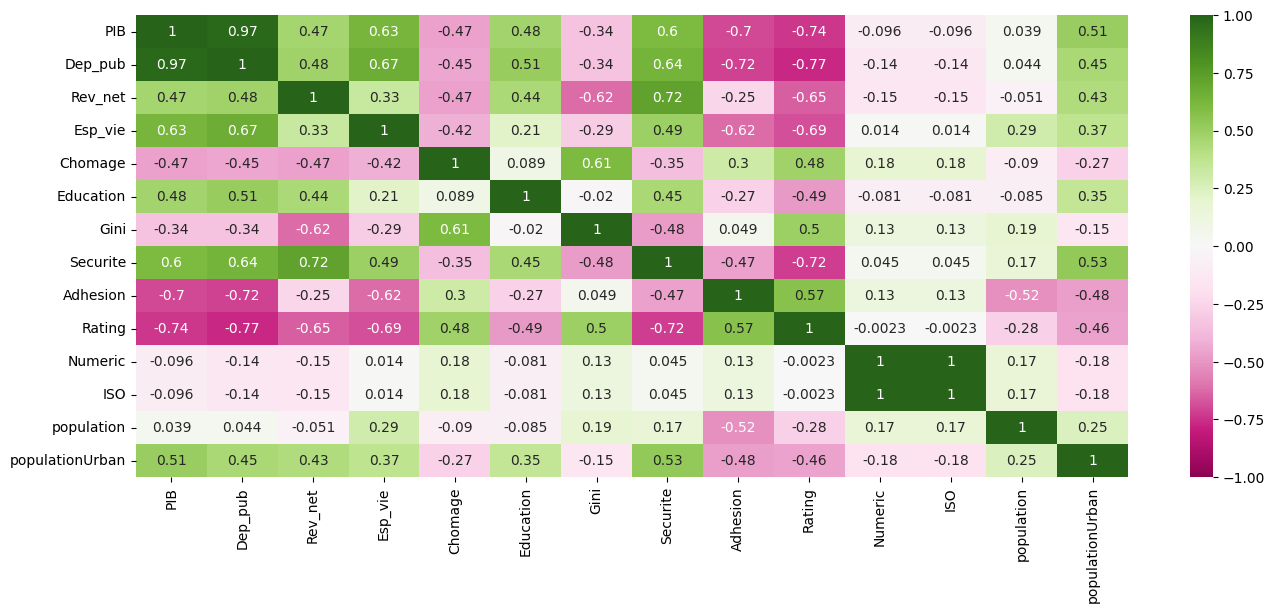

In [104]:
# interesting reading on how to set up the visuals of the correlation heatmap: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
plt.figure(figsize=(16, 6)) # control the size of the graphs that is going to be created
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap="PiYG", annot = True)

<Axes: xlabel='PIB', ylabel='Dep_pub'>

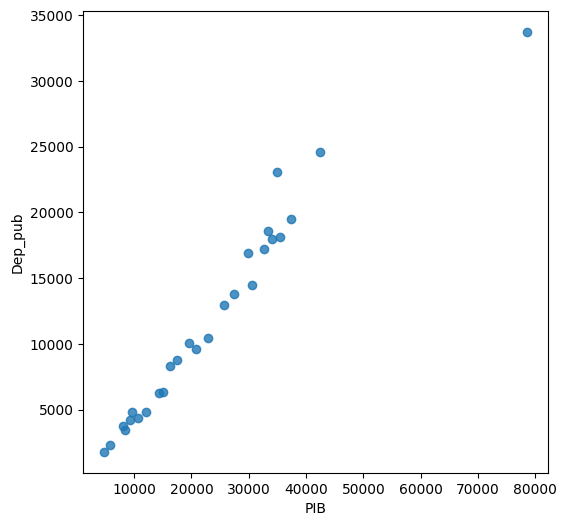

In [105]:
# https://www.python-graph-gallery.com/scatter-plot/
plt.figure(figsize=(6, 6)) # control the size of the graphs that is going to be created
sns.regplot(x = countries_ue_merged2.PIB, y =countries_ue_merged2.Dep_pub, fit_reg = False)

In [106]:
??sns.regplot

## More contents
Interesting tips when using Google Colab:


*   https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82
*   https://www.analyticsvidhya.com/blog/2020/04/5-amazing-google-colab-hacks-you-should-try-today/


*   https://colab.research.google.com/notebooks/data_table.ipynb
*   https://medium.com/analytics-vidhya/welcome-to-google-colab-tricks-and-tweaks-6eb7e9b65787


Useful ressources about using pandas


*   https://pandas.pydata.org/docs/user_guide/10min.html#min
*   List item


